In [24]:
#Goal of cell = goc
#goc, load in appropriate data 
import pandas as pd
import numpy as np
#empty list for txt file names
years = []
#columns followed by years
coln = [3,5,6,8,9,10,11,12,16,17,18,21,22,23,24,25,26,30,31,32,37,49,50,51,52,53,54,58,59,60,65]
colname = ['visitor','vgn','home','hgn','vscore','hscore','outs','d/n','park','at','time','vab','vhit','v2b','v3b','vhr','vrbi','vwalk','viwalk','vstrik','vlob','hab','hhit','h2b','h3b','hhr','hrbi','hwalk','hiwalk','hstrik','hlob']
#eventually we will run all the years with [i] at for filenames
#for i in range(len(years)):
mast = pd.read_csv('GL2015.TXT',sep=",",usecols= coln, names = colname)
mast.head()

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hab,hhit,h2b,h3b,hhr,hrbi,hwalk,hiwalk,hstrik,hlob
0,SLN,1,CHN,1,3,0,54,N,CHI11,35055.0,...,32,5,3,0,0,0,2,0,12,7
1,MIN,1,DET,1,0,4,51,D,DET05,45030.0,...,31,10,1,1,2,4,2,0,6,6
2,CLE,1,HOU,1,0,2,51,N,HOU03,43753.0,...,25,3,0,0,0,2,2,0,7,2
3,CHA,1,KCA,1,1,10,51,D,KAN06,40085.0,...,34,13,3,0,2,9,5,1,3,8
4,TOR,1,NYA,1,6,1,54,D,NYC21,48469.0,...,29,3,0,0,1,1,3,0,5,5


This cell utilizes a number of offensive statistics compared to number of at bats. This is the lowest common deniominator and serves to model the success rate of by a teams number of offensive opportunities. This cell also creates a ratio of number of hit types to number of total hits to gauge the dynamicism of a teams offensive. These ratios will serve as independant variables to our target variable win and we will also be able to plot, and examine how these ratios changed over time and how the dynamic changes in performance change relative to overall perfomrance. Ratios whose denominator are at bats are a measure of overall perfomance, ratios whose denominator are hits ar a measure of efficiency/dynamicism. The exception is LOB to hits which is a measure of the teams inefficiency. 

In [45]:
#goc, adds in ratios of success
#visitor'' batting average
vavg = mast.iloc[:,12]/mast.iloc[:,11]
#doubles out of at bats
v2b_avg = mast.iloc[:,13] / mast.iloc[:,11]
#doubles out of hits
v2b_h = mast.iloc[:,13]/ mast.iloc[:,12]
#triples out of at bats
v3b_avg = mast.iloc[:,14] / mast.iloc[:,11]
#triples out of hits
v3b_h = mast.iloc[:,14]/mast.iloc[:,12]
#home runs out of at bats
vhr_avg = mast.iloc[:,15]/ mast.iloc[:,11]
#home runs out of hits
vhr_h = mast.iloc[:,15]/ mast.iloc[:,12]
#RBIs, runs batted in per hits, a measure of efficiency/dynamicism of a teams offense
vrbi_h = mast.iloc[:,16] / mast.iloc[:,12]
#walks per at bat, a measure of how patient the team is, or how lucky. Its a truthful stat
vw_ab = mast.iloc[:,17]/ mast.iloc[:,11]
#Intentional walk per at bat, a measure of how feared a team is
viw_ab = mast.iloc[:,18]/mast.iloc[:,11]
#strikeouts per at bat
vso_ab = mast.iloc[:,19]/mast.iloc[:,11]
#tells us how many hits that resulted in outs, in a way this is the measure of the teams potential.
vmh_ab = (mast.iloc[:,11] - (mast.iloc[:,19] + mast.iloc[:,12])) / mast.iloc[:,11]
#the number lob per hits, a measure of a teams inefficiency 
vlob_avg = mast.iloc[:,20]/(mast.iloc[:,11])

#home'' batting average
havg = mast.iloc[:,22]/mast.iloc[:,21]
#doubles out of at bats
h2b_avg = mast.iloc[:,23] / mast.iloc[:,21]
#doubles out of hits
h2b_h = mast.iloc[:,23]/ mast.iloc[:,22]
#triples out of at bats
h3b_avg = mast.iloc[:,24] / mast.iloc[:,21]
#triples out of hits
h3b_h = mast.iloc[:,24]/mast.iloc[:,22]
#home runs out of at bats
hhr_avg = mast.iloc[:,25]/ mast.iloc[:,21]
#home runs out of hits
hhr_h = mast.iloc[:,25]/ mast.iloc[:,22]
#RBIs, runs batted in per hits, a measure of efficiency/dynamicism of a teams offense
hrbi_h = mast.iloc[:,26] / mast.iloc[:,22]
#walks per at bat, a measure of how patient the team is, or how lucky. Its a truthful stat
hw_ab = mast.iloc[:,27]/ mast.iloc[:,21]
#Intentional walk per at bat, a measure of how feared a team is
hiw_ab = mast.iloc[:,28]/mast.iloc[:,21]
#strikeouts per at bat
hso_ab = mast.iloc[:,29]/mast.iloc[:,21]
#tells us how many hits that resulted in outs, in a way this is the measure of the teams potential.
hmh_ab = (mast.iloc[:,21] - (mast.iloc[:,29] + mast.iloc[:,22])) / mast.iloc[:,21]
#the number lob per hits, a measure of a teams inefficiency 
hlob_avg = mast.iloc[:,30]/(mast.iloc[:,21])

#adds ratios as columns
mast['vavg'] = vavg
cnames = ['v2ba','v2bh','v3ba','v3bh','vhra','vhrh','vrbih','vwa','viwa','vsoa','vfoa','vloba','havg','h2ba','h2bh','h3ba','h3bh','hhra','hhrh','hrbih','hwa','hiwa','hsoa','hfoa','hloba']
values = [v2b_avg,v2b_h,v3b_avg,v3b_h,vhr_avg,vhr_h,vrbi_h,vw_ab,viw_ab,vso_ab,vmh_ab,vlob_avg,havg,h2b_avg,h2b_h,h3b_avg,h3b_h,hhr_avg,hhr_h,hrbi_h,hw_ab,hiw_ab,hso_ab,hmh_ab,hlob_avg]
for c in range(len(cnames)):
    mast[cnames[c]]= values[c]

total = mast.iloc[:,4] + mast.iloc[:,5]
mast['totals']= total
#mast

In [82]:
#creates a coulumn for if the home team won
winner = []
loser = []
for i in range(len(mast.iloc[:,0])):
    if mast.iloc[i,5] > mast.iloc[i,4]:
        winner.append(mast.iloc[i,2])
        loser.append(mast.iloc[i,0])
    else:
        winner.append(mast.iloc[i,0])
        loser.append(mast.iloc[i,2])
mast['winr'] = winner
mast['losr'] = loser
mast.head()

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hhra,hhrh,hrbih,hwa,hiwa,hsoa,hfoa,hloba,totals,losr
0,SLN,1,CHN,1,3,0,54,N,CHI11,35055.0,...,0.000000,0.000000,0.000000,0.062500,0.000000,0.375000,0.468750,0.218750,3,CHN
1,MIN,1,DET,1,0,4,51,D,DET05,45030.0,...,0.064516,0.200000,0.400000,0.064516,0.000000,0.193548,0.483871,0.193548,4,MIN
2,CLE,1,HOU,1,0,2,51,N,HOU03,43753.0,...,0.000000,0.000000,0.666667,0.080000,0.000000,0.280000,0.600000,0.080000,2,CLE
3,CHA,1,KCA,1,1,10,51,D,KAN06,40085.0,...,0.058824,0.153846,0.692308,0.147059,0.029412,0.088235,0.529412,0.235294,11,CHA
4,TOR,1,NYA,1,6,1,54,D,NYC21,48469.0,...,0.034483,0.333333,0.333333,0.103448,0.000000,0.172414,0.724138,0.172414,7,NYA


In [115]:
#initalise team list
teams = mast.iloc[:,0].unique()
tn = len(teams)
teaml = teams.tolist() 
home = {}
visitor = {}
total = {}
for a in range(tn):
    home["team{0}".format(a)] = mast[mast['home']== teams[a]]
    visitor["team{0}".format(a)] = mast[mast['visitor']== teams[a]]
    total["team{0}".format(a)] = mast[(mast['visitor'] == teams[a]) | (mast['home'] == teams[a])]
home['team0']

,visitor,vgn,home,hgn,vscore,hscore,outs,d/n,park,at,...,hhra,hhrh,hrbih,hwa,hiwa,hsoa,hfoa,hloba,totals,losr
104,MIL,7,SLN,6,5,4,54,D,STL10,47875.0,...,0.000000,0.000000,0.333333,0.162162,0.027027,0.162162,0.594595,0.324324,9,SLN
132,MIL,8,SLN,7,2,4,51,N,STL10,40826.0,...,0.000000,0.000000,0.400000,0.029412,0.000000,0.117647,0.588235,0.205882,6,MIL
137,MIL,9,SLN,8,0,4,51,D,STL10,40079.0,...,0.000000,0.000000,0.363636,0.060606,0.000000,0.151515,0.515152,0.212121,4,MIL
152,CIN,10,SLN,9,1,6,51,N,STL10,46462.0,...,0.000000,0.000000,0.857143,0.068966,0.034483,0.344828,0.413793,0.103448,7,CIN
167,CIN,11,SLN,10,2,5,51,D,STL10,45906.0,...,0.029412,0.100000,0.500000,0.088235,0.058824,0.058824,0.647059,0.235294,7,CIN
182,CIN,12,SLN,11,1,2,51,N,STL10,40742.0,...,0.038462,0.250000,0.500000,0.000000,0.000000,0.115385,0.730769,0.038462,3,CIN
289,PHI,20,SLN,18,4,1,54,N,STL10,40052.0,...,0.000000,0.000000,0.200000,0.129032,0.032258,0.419355,0.419355,0.258065,5,SLN
303,PHI,21,SLN,19,5,11,51,N,STL10,40143.0,...,0.000000,0.000000,0.733333,0.171429,0.000000,0.114286,0.457143,0.257143,16,PHI
318,PHI,22,SLN,20,2,5,51,N,STL10,40399.0,...,0.000000,0.000000,0.555556,0.062500,0.000000,0.187500,0.531250,0.187500,7,PHI
326,PHI,23,SLN,21,3,9,51,D,STL10,40715.0,...,0.031250,0.083333,0.666667,0.218750,0.000000,0.093750,0.531250,0.218750,12,PHI


In [100]:
#home['team0'].describe()

In [130]:
gl = 0
gw = 0
winl = []
lossl = []
win = {}
loss = {}
for t in range(tn):
    win["team{}".format(t)] = []
    loss["team{}".format(t)] = []
    
for t in range(tn):
    for b in range(len(mast['winr'][:])):
        if teams[t] == mast['winr'][b] or teams[t] == mast['losr'][b]:
            if teams[t] == mast['winr'][b]:
                gw = gw + 1
                gl = gl + 0
                win["team{}".format(t)].append(gw)
                loss["team{}".format(t)].append(gl)
            else:
                gl = gl + 1
                gw = gw + 0
                loss["team{}".format(t)].append(gl)
                win["team{}".format(t)].append(gw)
           


In [116]:
field = mast.iloc[:,8].unique()
fn = len(field)
fieldl = field.tolist() 
fields = {}

for a in range(fn):
    fields["field{0}".format(a)] = mast[mast['park']== field[a]]

avg_at = np.mean(fields['field0']['at'])


<Figure size 432x288 with 0 Axes>

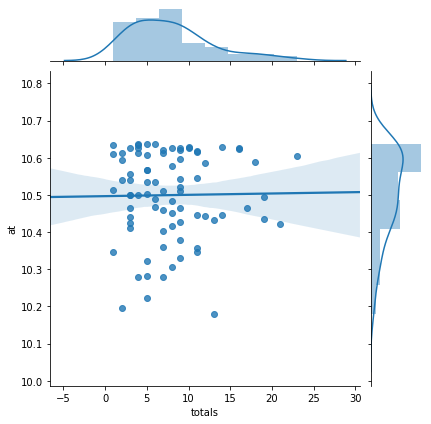

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# plt.plot(np.log(fields['field0']['at']))
# plt.plot(fields['field0']['totals'])
plt.figure()
#ns.jointplot(fields['field0']['totals'],np.log(fields['field0']['at']),kind='reg')
sns.lmplot(x="Totalsl_width", hue="species",
               height=5, data=mast)